In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

In [3]:
store_sales = pd.read_csv(r"C:\Users\Praveen\company sales data.csv")
store_sales.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
store_sales.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [5]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [6]:
store_sales = store_sales.drop(['store','item'],axis=1)

In [7]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


In [8]:
store_sales['date']=pd.to_datetime(store_sales['date'])
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


In [9]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


In [10]:
store_sales['date']= store_sales['date'].dt.to_period("M")
monthly_sales= store_sales.groupby('date').sum().reset_index()

In [11]:
monthly_sales['date']= monthly_sales['date'].dt.to_timestamp()
monthly_sales.head(10)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


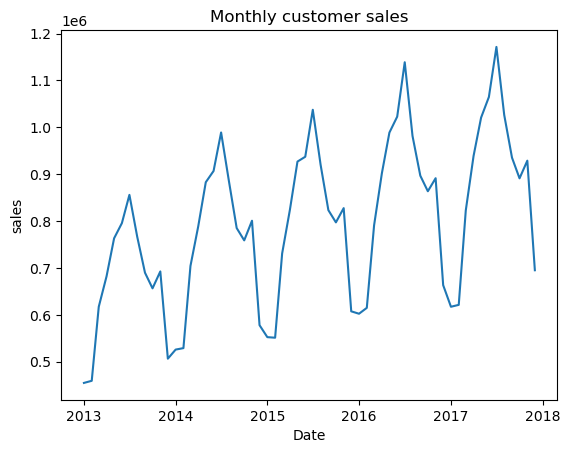

In [12]:
#plt.fig(figsize(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("sales")
plt.title("Monthly customer sales")
plt.show()

In [13]:
monthly_sales['sales_diff']=monthly_sales['sales'].diff()
monthly_sales= monthly_sales.dropna()
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


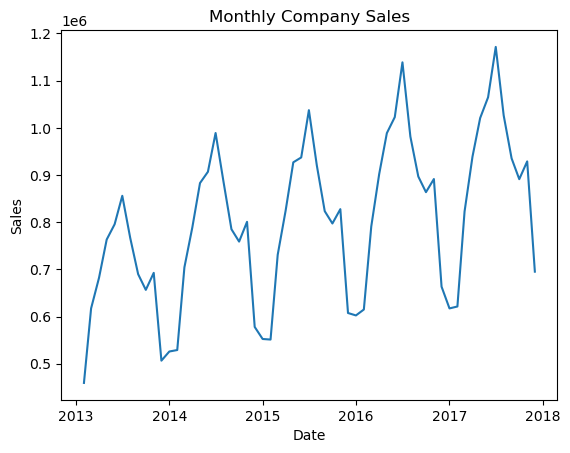

In [14]:
#plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Company Sales")
plt.show()

In [15]:
monthly_sales['sales_diff']= monthly_sales['sales'].diff()
monthly_sales=monthly_sales.dropna()
monthly_sales.head(10)

,date,sales,sales_diff
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0
11,2013-12-01,506607,-186036.0


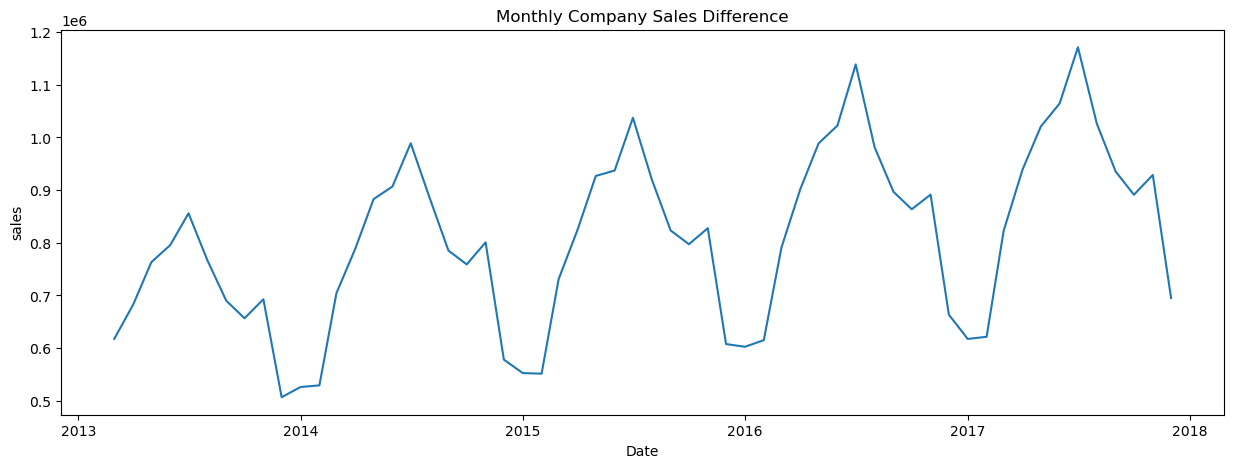

In [16]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("sales")
plt.title("Monthly Company Sales Difference")
plt.show()

In [17]:
supervised_data = monthly_sales.drop(['date','sales'],axis=1)

In [18]:
for i in range(1,13):
    col_name ='month_'+str(i)
    supervised_data[col_name]=supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
1,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
2,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
3,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
4,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
5,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
6,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
7,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
8,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0
9,-222735.0,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0


In [19]:
train_data= supervised_data[:-12]
test_data= supervised_data[-12:]
print("Train Data shape:",train_data.shape)
print("Test Data shape:",test_data.shape)

Train Data shape: (34, 13)
Test Data shape: (12, 13)


In [20]:
scaler= MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data=scaler.transform(train_data)
test_data= scaler.transform(test_data)

In [21]:
x_train,y_train=train_data[:,1:],train_data[:,0:1]
x_test, y_test= test_data[:,1:],test_data[:,0:1]
y_train= y_train.ravel()
y_test= y_test.ravel()
print("x_train shape:",x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (34, 12)
y_train shape: (34,)
x_test shape: (12, 12)
y_test shape: (12,)


In [22]:
sales_dates= monthly_sales['date'][-12:].reset_index(drop=True)
predict_df=pd.DataFrame(sales_dates)

In [23]:
act_sales = monthly_sales['sales'][-13:].to_list()
print(act_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


In [24]:
lr_model =LinearRegression()
lr_model.fit(x_train, y_train)
lr_pre = lr_model.predict(x_test)

In [25]:
lr_pre = lr_pre.reshape(-1,1)
lr_pre_test_set= np.concatenate([lr_pre, x_test], axis= 1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

In [26]:
import pandas as pd
result_list=[]
for index in range(0, len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0]+ act_sales[index])
lr_pre_series= pd.Series(result_list, name="Linear Prediction")
predict_df = predict_df.merge(lr_pre_series, left_index = True, right_index= True)

In [27]:
# lr_mse= np.sqrt(mean_squared_error(pridict_df))
print(predict_df)

         date  Linear Prediction
0  2017-01-01       6.478752e+05
1  2017-02-01       6.296918e+05
2  2017-03-01       8.197435e+05
3  2017-04-01       9.433828e+05
4  2017-05-01       1.033676e+06
5  2017-06-01       1.065058e+06
6  2017-07-01       1.201530e+06
7  2017-08-01       1.001867e+06
8  2017-09-01       9.412975e+05
9  2017-10-01       9.081158e+05
10 2017-11-01       9.163515e+05
11 2017-12-01       6.948589e+05


In [28]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'],monthly_sales['sales'][-12:])
lr_r2 = r2_score = (predict_df['Linear Prediction'],monthly_sales['sales'][-12:])
print("Linear Regression MSE:",lr_mse)
print("Linear Regression MAE:",lr_mae)
print("Linear Regression R2:",lr_r2)

Linear Regression MSE: 16308.946774591577
Linear Regression MAE: 12518.32186372777
Linear Regression R2: (0     6.478752e+05
1     6.296918e+05
2     8.197435e+05
3     9.433828e+05
4     1.033676e+06
5     1.065058e+06
6     1.201530e+06
7     1.001867e+06
8     9.412975e+05
9     9.081158e+05
10    9.163515e+05
11    6.948589e+05
Name: Linear Prediction, dtype: float64, 48     617306
49     621369
50     822667
51     938862
52    1020686
53    1064624
54    1171393
55    1026403
56     935263
57     891160
58     928837
59     695170
Name: sales, dtype: int64)


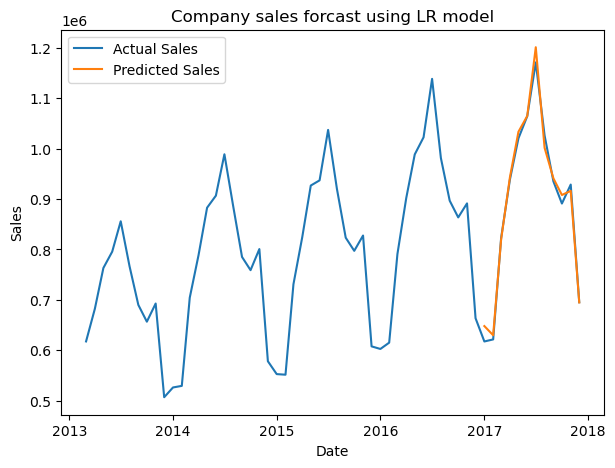

In [29]:
plt.figure(figsize=(7,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'],predict_df['Linear Prediction'])
plt.title('Company sales forcast using LR model')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()

In [30]:
# Root Mean Square Error
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test,lr_pre))

0.0800103356608225

In [31]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as plt

In [32]:
store_sales= pd.read_csv('company sales data.csv')
store_sales

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib','inline')

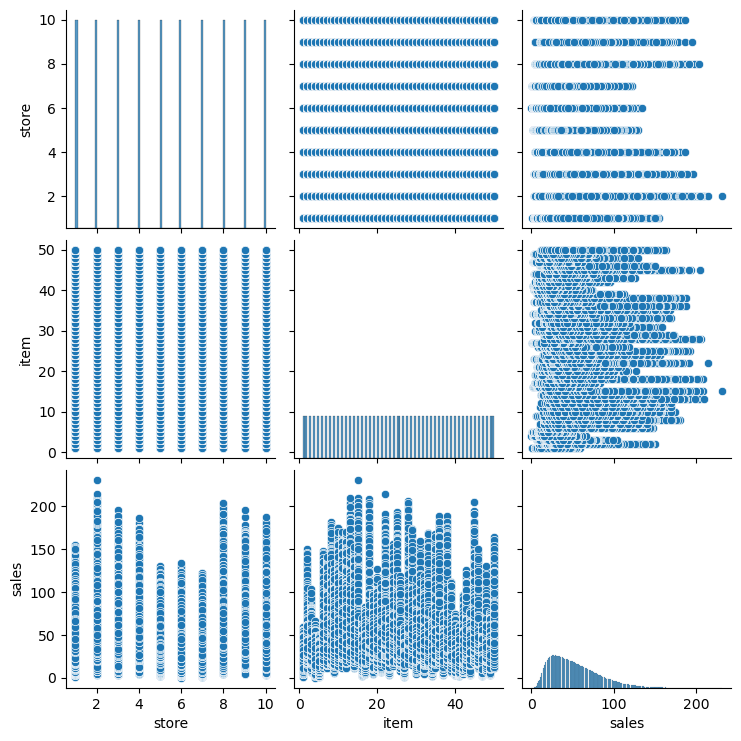

In [34]:
#pairplot
sns.pairplot(store_sales)

In [35]:
sales = pd.get_dummies(store_sales['sales'],drop_first = True)
sales

,1,2,3,4,5,6,7,8,9,10,...,203,204,205,206,207,208,209,210,214,231
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
store_sales=pd.concat([store_sales,sales],axis=1)
store_sales

,date,store,item,sales,1,2,3,4,5,6,...,203,204,205,206,207,208,209,210,214,231
0,2013-01-01,1,1,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01-02,1,1,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-01-03,1,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-01-04,1,1,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-01-05,1,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912996,2017-12-28,10,50,59,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912997,2017-12-29,10,50,74,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912998,2017-12-30,10,50,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# splitting the dataset for training and testing:
 

In [37]:
 x= store_sales[['store','item']]
 y= store_sales ['sales']

In [38]:
x

,store,item
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
912995,10,50
912996,10,50
912997,10,50
912998,10,50


In [39]:
import sklearn
from sklearn.model_selection import(train_test_split)
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.4)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
Prediction = rf.predict(x_test)
Prediction

array([27, 59, 29, ..., 65, 42, 22], dtype=int64)

In [42]:
rf.score(x_train,y_train)

0.03957648776925885

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,Prediction))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
print(classification_report(y_test,Prediction))

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        88
           5       0.00      0.00      0.00       158
           6       0.00      0.00      0.00       321
           7       0.00      0.00      0.00       547
           8       0.00      0.00      0.00       829
           9       0.00      0.00      0.00      1064
          10       0.00      0.00      0.00      1477
          11       0.00      0.00      0.00      1772
          12       0.07      0.07      0.07      2242
          13       0.07      0.08      0.08      2678
          14       0.06      0.06      0.06      3080
          15       0.06      0.01      0.02      3498
          16       0.06      0.07      0.07      3912
          17       0.06      0.08      0.07      4310
          18       0.05    

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
